## Arbol de decisión
#### Angel Rubén Vázquez Rivera - A01735407

In [1]:
import pandas as pd
from pandas import Series,DataFrame

setInicial=pd.read_csv('./files/Vinos.csv')

#Recuperar nombres de las columnas de los atributos y la clase
atributosName=setInicial.columns[:-1] #All the atributtes
atributoClase=setInicial.columns[-1] # Only the class of the real set

dataGral=setInicial[atributosName]#Datos de los atributos
claseGral=setInicial[atributoClase] #Datos de la clase (vector de elementos reales)

#print("Distribucion de clases: \n",claseGral.value_counts(),"\n\n")


### Generar un solo modelo / Entrenamiento

#### Separación de conjuntos

In [2]:
from sklearn.model_selection import train_test_split

#Separar los datos
#Particiones usuales: 80/20 70/30 67/33
valoresTrain, valoresTest, clasesTrain, clasesTest = train_test_split(dataGral, claseGral, test_size=0.30)

""" print("CONJUNTOS DE ENTRENAMIENTO Y TEST\n")
print("Instancias de conjunto de entrenamiento")
print(clasesTrain.value_counts(), "\n")

print("Instancias de conjunto para clasificar")
print(clasesTest.value_counts(), "\n") """

' print("CONJUNTOS DE ENTRENAMIENTO Y TEST\n")\nprint("Instancias de conjunto de entrenamiento")\nprint(clasesTrain.value_counts(), "\n")\n\nprint("Instancias de conjunto para clasificar")\nprint(clasesTest.value_counts(), "\n") '

Exactitud Con Profundidad de 2: 84.09 %
Exactitud Con Profundidad de 3: 82.2 %
Exactitud Con Profundidad de 4: 87.88 %
Exactitud Con Profundidad de 5: 87.88 %
Exactitud Con Profundidad de 6: 86.74 %
Exactitud Con Profundidad de 7: 87.5 %


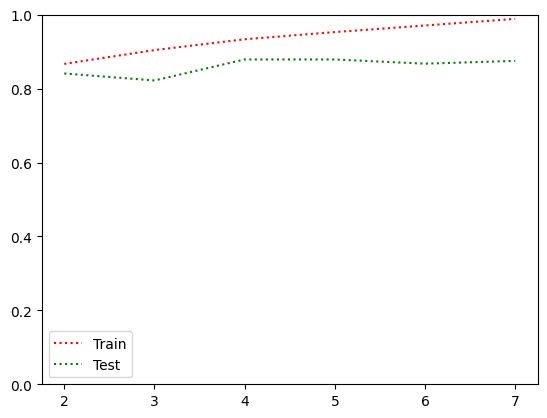

In [87]:

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt


prof = [2,3,4,5,6,7]#Profundidades por probar

Train= [] 
Test = []

#Modelo
for x in prof:
################## Clasificador ######################
    clasificador = DecisionTreeClassifier(criterion = 'entropy', max_depth=x)# max_depth = 3, min_samples_split=50 )
    
    ################## Modelo ###########################
    modelo = clasificador.fit(valoresTrain, clasesTrain)

    predic = modelo.predict(valoresTest)
    predicTrain = modelo.predict(valoresTrain)

    #Evaluar
    Test.append(accuracy_score(clasesTest,predic))
    Train.append(accuracy_score(clasesTrain, predicTrain))
    
    print(f"Exactitud Con Profundidad de {x}:",round(accuracy_score(clasesTest,predic) * 100, 2),"%")

#Show the differents metrics for each depth value  
plt.plot(prof, Train, label = "Train", color = "red", linestyle = "dotted")
plt.plot(prof, Test, label = "Test", color = "green", linestyle = "dotted")
plt.ylim(0,1)
plt.legend()


In [89]:
""" %%shell
jupyter nbconvert --to html 2_1_Arbol.ipynb """

UsageError: Cell magic `%%` not found.
